In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Retrieve Human graded resources

In [18]:
file1_path = '../Data/TIPQIC_project_charter_submission_merged_classified.csv'
result_df_file1 = pd.read_csv(file1_path)
# Rename columns
result_df_file1.rename(columns={'score': 'Real_Grade', 'description': 'Section', 'long_description': 'Criteria'}, inplace=True)
result_df_file1

,grader_id,user_id,attachment_url,section_id,Real_Grade,grader_comment,Section,Criteria,grader_name
0,82762024,593634504,https://canvas.instructure.com/files/255845432...,_7292,1,"I see the identified project name, facility, p...",Process Milestone,Identifies the process milestone target for th...,Matt Martin
1,82762024,593634504,https://canvas.instructure.com/files/255845432...,_4258,0,"I see some project description, but no purpose...",Project Description,Includes a brief description of the project.<b...,Matt Martin
2,82762024,593634504,https://canvas.instructure.com/files/255845432...,_4499,1,I see a detailed problem summary with appropri...,Project Overview,Describes problem or performance gap with desc...,Matt Martin
3,82762024,593634504,https://canvas.instructure.com/files/255845432...,_3182,0,I see project tasks but no due dates.,Timeline,Lists each key task and planned completion dates.,Matt Martin
4,82762024,593634504,https://canvas.instructure.com/files/255845432...,_5706,1,I see clear scope objectives and a clear scope...,Project Scope,Explains objectives that are in scope.<br/>\r\...,Matt Martin
...,...,...,...,...,...,...,...,...,...
931,110796312,610632578,https://canvas.instructure.com/files/270735236...,_4258,1,I see a clear project description and purpose ...,Project Description,Includes a brief description of the project.<b...,Phelene de Vries Stoutt
932,110796312,610632578,https://canvas.instructure.com/files/270735236...,_4499,1,"I see details on problem summary, desired outc...",Project Overview,Describes problem or performance gap with desc...,Phelene de Vries Stoutt
933,110796312,610632578,https://canvas.instructure.com/files/270735236...,_3182,1,I see project tasks but no due dates.,Timeline,Lists each key task and planned completion dates.,Phelene de Vries Stoutt
934,110796312,610632578,https://canvas.instructure.com/files/270735236...,_5706,1,I see project tasks but no due dates.,Project Scope,Explains objectives that are in scope.<br/>\r\...,Phelene de Vries Stoutt


In [19]:
# visualize_df = result_df[['user_id', 'Section', 'Criteria', 'AI_Grade', 'Real_Grade', 'grader_name']]
visualize_df_file1 = result_df_file1[['user_id', 'Section', 'Criteria', 'Real_Grade', 'grader_name']]
visualize_df_file1

,user_id,Section,Criteria,Real_Grade,grader_name
0,593634504,Process Milestone,Identifies the process milestone target for th...,1,Matt Martin
1,593634504,Project Description,Includes a brief description of the project.<b...,0,Matt Martin
2,593634504,Project Overview,Describes problem or performance gap with desc...,1,Matt Martin
3,593634504,Timeline,Lists each key task and planned completion dates.,0,Matt Martin
4,593634504,Project Scope,Explains objectives that are in scope.<br/>\r\...,1,Matt Martin
...,...,...,...,...,...
931,610632578,Project Description,Includes a brief description of the project.<b...,1,Phelene de Vries Stoutt
932,610632578,Project Overview,Describes problem or performance gap with desc...,1,Phelene de Vries Stoutt
933,610632578,Timeline,Lists each key task and planned completion dates.,1,Phelene de Vries Stoutt
934,610632578,Project Scope,Explains objectives that are in scope.<br/>\r\...,1,Phelene de Vries Stoutt


## Retrieve LLM generated assessment result

In [20]:
file2_path = '../Documents/Results/Result_Scope.csv'
result_df_file2 = pd.read_csv(file2_path)
result_df_file2

,Unnamed: 0,user_id,AI_Grade,Comment,Section,Criteria
0,1,594615885,1,The statement describes the main objective of ...,Project Scope,Question 1. Does the 'In Scope Project Objecti...
1,2,594615885,1,The statement explicitly excludes activities t...,Project Scope,Question 2. Does the 'Out of Scope Project Obj...
2,1,594665284,1,The statement describes the main objective of ...,Project Scope,Question 1. Does the 'In Scope Project Objecti...
3,2,594665284,0,The statement about resource limitations and r...,Project Scope,Question 2. Does the 'Out of Scope Project Obj...
4,1,593818150,1,The 'In-Scope Project Objectives' clearly desc...,Project Scope,Question 1. Does the 'In Scope Project Objecti...
...,...,...,...,...,...,...
107,2,593818149,1,The statement explicitly excludes activities t...,Project Scope,Question 2. Does the 'Out of Scope Project Obj...
108,1,594615886,1,The statement describes the main objectives of...,Project Scope,Question 1. Does the 'In Scope Project Objecti...
109,2,594615886,1,The statement explicitly excludes Specialty Cl...,Project Scope,Question 2. Does the 'Out of Scope Project Obj...
110,1,593772947,1,The statement describes the main objective of ...,Project Scope,Question 1. Does the 'In Scope Project Objecti...


## AI difference for pass and fail submissions

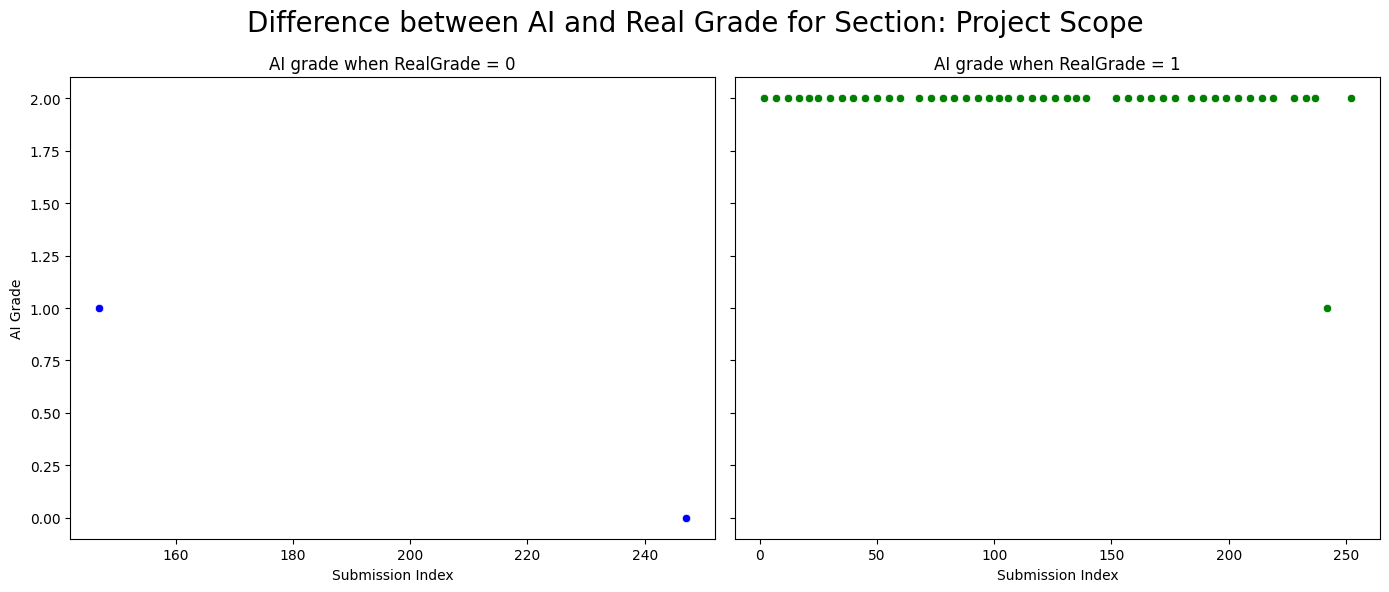

In [5]:
# 1. Load the data from existing DataFrames
df_real = visualize_df_file1[["user_id", "Section", "Real_Grade"]]
df_ai = result_df_file2[["user_id", "AI_Grade"]]

# 2. Aggregate AI_Grade by summing up values for each user_id
df_ai_sum = df_ai.groupby("user_id", as_index=False)["AI_Grade"].sum()

# 3. Merge the two dataframes on 'user_id'
# This ensures that only matching user_ids are considered
merged_df = pd.merge(df_real, df_ai_sum, on="user_id", how="inner")

# Function to visualize the difference between AI_Grade and Real_Grade
def visualize_difference_between_AI_and_Real_Grade(merged_df, section):
    """
    Visualize AI_Grade for submissions with Real_Grade = 0 and Real_Grade = 1
    using scatter plots for a given section.
    """
    # Filter the dataframe for the given section
    section_df = merged_df[merged_df['Section'] == section]

    # Separate the data into two subsets based on Real_Grade
    real_grade_0 = section_df[section_df['Real_Grade'] == 0]
    real_grade_1 = section_df[section_df['Real_Grade'] == 1]

    # Create a figure with two subplots for Real_Grade = 0 and Real_Grade = 1
    fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)
    fig.suptitle(f'Difference between AI and Real Grade for Section: {section}', fontsize=20)

    # Scatter plot for Real_Grade = 0
    sns.scatterplot(ax=axes[0], x=real_grade_0.index, y=real_grade_0['AI_Grade'], color='blue')
    axes[0].set_title('AI grade when RealGrade = 0')
    axes[0].set_xlabel('Submission Index')
    axes[0].set_ylabel('AI Grade')

    # Scatter plot for Real_Grade = 1
    sns.scatterplot(ax=axes[1], x=real_grade_1.index, y=real_grade_1['AI_Grade'], color='green')
    axes[1].set_title('AI grade when RealGrade = 1')
    axes[1].set_xlabel('Submission Index')

    # Adjust layout for better spacing
    plt.tight_layout()
    plt.show()

# Example: Run the visualization function for a specific section
visualize_difference_between_AI_and_Real_Grade(merged_df, "Project Scope")

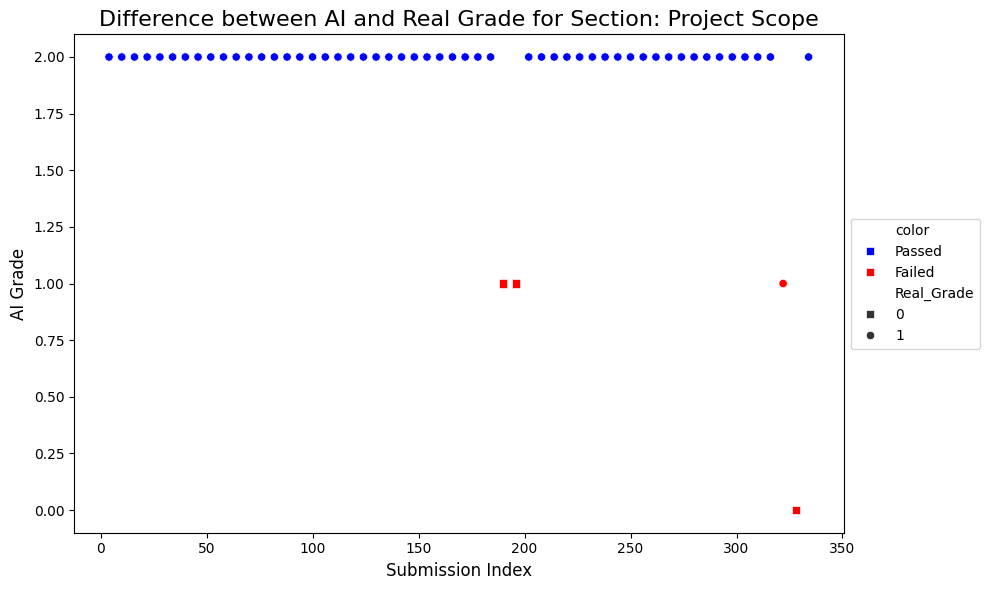

In [ ]:
# 1. Load the data from existing DataFrames
df_real = visualize_df_file1[["user_id", "Section", "Real_Grade"]]
df_ai = result_df_file2[["user_id", "AI_Grade"]]

# 2. Aggregate AI_Grade by summing up values for each user_id
df_ai_sum = df_ai.groupby("user_id", as_index=False)["AI_Grade"].sum()

# 3. Merge the two DataFrames on 'user_id'
# This ensures that only matching user_ids are considered
merged_df = pd.merge(
    visualize_df_file1[["user_id", "Section", "Real_Grade"]],
    df_ai_sum,
    on="user_id",
    how="inner"
)

# 4. Visualize the difference between AI_Grade and Real_Grade in a single plot
def visualize_difference_with_threshold(merged_df, section, threshold):

    # Filter the dataframe for the given section
    section_df = merged_df[merged_df['Section'] == section].copy()

    # Define colors based on whether AI_Grade passes the threshold
    section_df['color'] = section_df['AI_Grade'].apply(
        lambda grade: 'blue' if grade >= threshold else 'red'
    )

    # Map Real_Grade to specific markers
    style_mapping = {1: 'o', 0: 's'}  # Circle for 1, Square for 0

    # Create a scatter plot
    plt.figure(figsize=(10, 6))
    plt.title(f'Difference between AI and Real Grade for Section: {section}', fontsize=16)

    # Scatter plot
    scatter = sns.scatterplot(
        data=section_df,
        x=section_df.index,
        y='AI_Grade',
        hue='color',  # Use color for threshold passing
        style='Real_Grade',  # Use Real_Grade for marker style
        markers=style_mapping,  # Define marker styles for Real_Grade
        palette={'blue': 'blue', 'red': 'red'},  # Define color mapping
        legend='full'
    )

    # Modify legend title and labels
    handles, labels = scatter.get_legend_handles_labels()
    new_labels = {
        "blue": "Passed",
        "red": "Failed",
        "o": "Real_Grade = 1 (Circle)",
        "s": "Real_Grade = 0 (Square)"
    }
    updated_labels = [new_labels.get(label, label) for label in labels]
    plt.legend(handles, updated_labels, loc='center left', bbox_to_anchor=(1, 0.5))

    # Add labels and legend
    plt.xlabel('Submission Index', fontsize=12)
    plt.ylabel('AI Grade', fontsize=12)
    plt.tight_layout()
    plt.show()

# Example usage
visualize_difference_with_threshold(merged_df, "Project Scope", threshold=2)

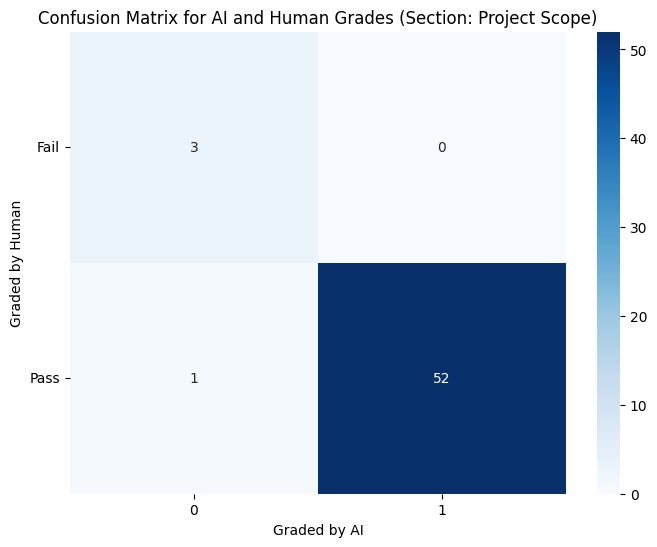

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# 1. Load data: Select only the necessary columns from two DataFrames
df_real = visualize_df_file1[["user_id", "Section", "Real_Grade"]]
df_ai = result_df_file2[["user_id", "AI_Grade"]]

# 2. Aggregate AI_Grade by summing values for each user_id
df_ai_sum = df_ai.groupby("user_id", as_index=False)["AI_Grade"].sum()

# 3. Merge the two DataFrames: Match entries based on user_id
merged_df = pd.merge(df_real, df_ai_sum, on="user_id", how="inner")

# 4. Binarize AI Grade to 0 or 1
threshold = 2
merged_df['AI_Pred'] = (merged_df['AI_Grade'] >= threshold).astype(int)

# 5. Function to generate and visualize the Confusion Matrix
def plot_confusion_matrix(merged_df, section):

    # Filter data by section
    section_df = merged_df[merged_df['Section'] == section]

    # Actual Human Grade (Real_Grade) and AI predicted values (AI_Pred)
    y_true = section_df['Real_Grade']
    y_pred = section_df['AI_Pred']

    # Compute Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)

    # Visualize Confusion Matrix
    fig, ax = plt.subplots(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=True, ax=ax)
    ax.set_yticklabels(["Fail", "Pass"], rotation=0, ha="right")
    plt.xlabel('Graded by AI')
    plt.ylabel('Graded by Human')
    plt.title(f'Confusion Matrix for AI and Human Grades (Section: {section})')
    plt.show()

plot_confusion_matrix(merged_df, "Project Scope")